<a href="https://colab.research.google.com/github/ktakanov/InteractiveBiasAndVariance/blob/master/Vi%C3%A9s_e_Vari%C3%A2ncia_Interativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Viés e Variância intuição e prática - com código :)

## Pré-requisitos
- Antes de tudo precisamos instalar esta biblioteca.

In [ ]:
! pip install mlxtend==0.17.3

## Gerando dados fakes

- As funções a seguir geram uma instância de dados de forma aleatória. Você não precisa entender de forma xiita elas, apenas entender a intuição.
- A função *f* gera uma função senoidal. 
- A função *sample* usa a função *f* junto com uma distribuição aleatória para gerarmos instâncias para o nosso modelo. 
- Com isto, a partir de *sample* geramos uma entrada X para qual iremos usar um modelo de regressão para encontrar uma entrada que melhor representa X.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

def f(lim=10,spacing=100):
    "O parâmetro lim mostra os limites em que a funçao irá aparecer. O spacing sao os numeros de pontos dentro desses limites."
    x = np.linspace(-lim, lim, spacing)
    y = 20 * np.sin(x * 1.5)
    # y = x**(2)
    return (x,y)

def sample(lim=10,size=100,spacing=5):
    x,y = f(lim,size)
    randv = np.random.uniform(-spacing, spacing, size)
    return (x, y +randv)


- A célula a seguir mostra graficamente a plotagem de uma funçao senoidal com limites (-2,2) com um total de 100 instancias.
- Ela recebe por parâmetro *spacing* que indica quão espaçados as instancias estão em relação ao eixo *y*. 
- Para entender melhor, execute a célula de interação e apenas brinque com o *spacing*.

In [ ]:
from IPython import display
from ipywidgets import interact, widgets

MAX_LIM = 2.0
TOTAL_INSTANCES = 100
SPACING = 5  

f_x, f_y = f(MAX_LIM, TOTAL_INSTANCES)
x, y = sample(MAX_LIM, TOTAL_INSTANCES, SPACING)
def plotinstances(spacing):
  x, y = sample(MAX_LIM, TOTAL_INSTANCES, spacing)
  fig, ax = plt.subplots(figsize=(10,6))
  ax.plot(f_x, f_y, '--',label='Modelo usado para gerar instâncias')
  ax.scatter(x, y, marker='x',color='gray', label='Instâncias de entrada X')
  plt.legend()

In [ ]:
interact(plotinstances,spacing=widgets.IntSlider(min=0,max=10,step=1,value=10))

interactive(children=(IntSlider(value=10, description='spacing', max=10), Output()), _dom_classes=('widget-int…

<function __main__.plotinstances>

## Gerando um modelo de regressão polinomial

- A seguir, apresentaremos duas funções para encontrar um modelo que melhor representa os nossos dados gerados na célula anterior.
- A função fit_polynomial encontra os melhores parâmetros do regressor polinomial para a entrada de acordo com o grau do polinômio *d*. 
- A função apply_polynomial, usa o modelo encontrado na função anterior para tentar se adequar/prever o seu comportamento em uma nova entrada *x* usando um grau *d*.


In [ ]:

from sklearn.linear_model import LinearRegression

def fit_polynomial(x, y, d):
  poly_reg = PolynomialFeatures(degree=d)
  X_poly = poly_reg.fit_transform(x.reshape(-1, 1))

  lin_reg = LinearRegression()
  lin_reg.fit(X_poly, y.reshape(-1, 1))
  return lin_reg
def apply_polynomial(model, x, d):
  poly_reg = PolynomialFeatures(degree=d)
  X_poly = poly_reg.fit_transform(x.reshape(-1, 1))
  y_pred = model.predict(X_poly)
  return y_pred

- Para entender melhor, utilize a interação abaixo para o modelo encontrar diferentes comportamentos para um dado grau *d*.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import make_pipeline
import operator

def fit_and_apply(degree):
  model = fit_polynomial(x, y, degree)
  p_y = apply_polynomial(model, x, degree)
  
  fig, ax = plt.subplots(figsize=(10,6))
  ax.plot(x,p_y, label='Polinômio gerado pelo modelo.')
  ax.scatter(x, y, marker='x',color='gray', label='Instâncias de entrada X')
  ax.legend()

- Perceba que quanto maior o grau do polinômio, mais ele se adequa as instâncias de entrada.

In [ ]:
interact(fit_and_apply,degree=widgets.IntSlider(min=0,max=20,step=1,value=20))

interactive(children=(IntSlider(value=20, description='degree', max=20), Output()), _dom_classes=('widget-inte…

<function __main__.fit_and_apply>

In [ ]:
from sklearn.model_selection import train_test_split
x_train = x
y_train = y
x_test,y_test = sample(MAX_LIM, int(TOTAL_INSTANCES * 0.3), SPACING)
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
from numpy.linalg import norm
import seaborn as sns
from mlxtend.evaluate import bias_variance_decomp

# mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
font=22
n_samples = int(20)


f_x, f_y = f(MAX_LIM, n_samples)

# f_x, f_y = f(n_samples)
max_degree = 17

var_vals =[]
bias_vals = []
error_vals = []

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


def fit_tests_with_metrics(degree):
  poly_reg = PolynomialFeatures(degree=degree)
  x_train_p = poly_reg.fit_transform(x_train.reshape(-1, 1))
  x_test_p = poly_reg.fit_transform(x_test.reshape(-1, 1))
  
  model = LinearRegression()
  avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(model, x_train_p, y_train, x_test_p, y_test, loss='mse', random_seed=123)
  p_y = model.predict(x_test_p)
  return (p_y, avg_bias, avg_var, avg_expected_loss)

def fit_tests_with_metrics_plot(degree):

  p_y, avg_bias, avg_var, avg_expected_loss = fit_tests_with_metrics(degree)

  plt.figure(figsize=(10,10))
  plt.subplot(211)
  plt.title("Model fitting for degree = " + str(degree))
  plt.scatter(x_train,y_train,marker='x',color='gray',label="Instances used for training")
  plt.plot(x_test, p_y, label="Predicted regressor for testing instances")
  plt.legend()


  plt.subplot(212)
  ax = plt.gca()
  plt.title("Model erros")

  plt.bar(['bias','variance','squared-error'],[avg_bias,avg_var,avg_expected_loss])
  ax.set_xticklabels(["bias","variance","squared-error"],fontsize=15)



  plt.show() 
  

In [ ]:
interact(fit_tests_with_metrics_plot,degree=widgets.IntSlider(min=0,max=20,step=1,value=20))

interactive(children=(IntSlider(value=20, description='degree', max=20), Output()), _dom_classes=('widget-inte…

<function __main__.fit_tests_with_metrics_plot>

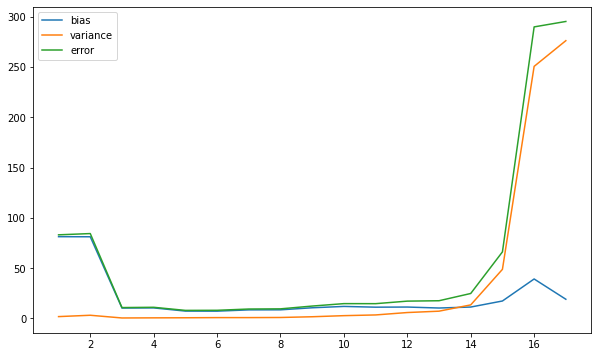

In [ ]:
from numpy.linalg import norm
import seaborn as sns
from mlxtend.evaluate import bias_variance_decomp

# mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)

n_samples = int(20)


f_x, f_y = f(MAX_LIM, n_samples)

# f_x, f_y = f(n_samples)
max_degree = 17

var_vals =[]
bias_vals = []
error_vals = []

PLOT = False
for degree in range(1, max_degree+1):
  _,bias,var,error = fit_tests_with_metrics(degree)
  bias_vals.append(bias)
  var_vals.append(var)
  error_vals.append(error)

plt.figure(figsize=(10,6))

plt.plot(range(1, max_degree+1), bias_vals, label='bias')
plt.plot(range(1, max_degree+1), var_vals, label='variance')
plt.plot(range(1, max_degree+1), error_vals, label='error')
plt.legend()